In [1]:
import pandas as pd
df=pd.read_csv('cleaned_taobao_reviews.csv')
df.head(5)

,评论ID,用户名,评论内容,清洗后评论,处理后文本,评分,点赞数,评论时间,cleaned_review
0,fa046802-4a1c-45d3-84a6-68c02e875ed5,Maria Nelly Arevalo Toala,"I've been using this app for about a month, an...",ive been using this app for about a month and ...,ive using app month options good however main ...,2,37,2025-05-15 07:51:21,ive using app month options good however main ...
1,588015dc-9dfe-408f-8bdf-f6a3c274780d,Rayna Maschan,"Language Barrier and unfortunately, the only l...",language barrier and unfortunately the only la...,language barrier unfortunately language option...,3,217,2025-04-14 08:45:44,language barrier unfortunately language option...
2,342b6a5f-1f2d-4ecb-af6a-35b3da4116e7,Celina Lee,Keeps having you sign in repeatedly then claim...,keeps having you sign in repeatedly then claim...,keeps sign repeatedly claims security risks ac...,1,268,2025-04-12 02:08:13,keeps sign repeatedly claims security risks ac...
3,bd012696-c2d0-436c-a163-970b89e8ae21,Greg,It's pretty satisfying and cheap. Only thing i...,its pretty satisfying and cheap only thing is ...,pretty satisfying cheap thing though ask sign ...,2,149,2025-03-11 05:57:00,pretty satisfying cheap thing though ask sign ...
4,48835ad9-b550-4a5d-8775-7268349d4e01,Linda Wong,I bought more than two hundred products since ...,i bought more than two hundred products since ...,bought two hundred products since last year fr...,5,1000,2025-04-21 16:23:18,bought two hundred products since last year fr...


In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel
import gensim
from gensim.corpora import Dictionary
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['cleaned_review'])

In [6]:
texts = [text.split() for text in df['cleaned_review']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics, 
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [7]:
start = 5
limit = 30
step = 5
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

0.4720161349283406
0.4654920555692638
0.42421503364391094
0.4063284123914184
0.38558769024586853


通过运行这段代码，你将得到一系列LDA模型和它们对应的连贯性得分，这些得分可以帮助你确定最佳的主题数量。连贯性得分越高，表示模型生成的主题越具有一致性和可解释性。

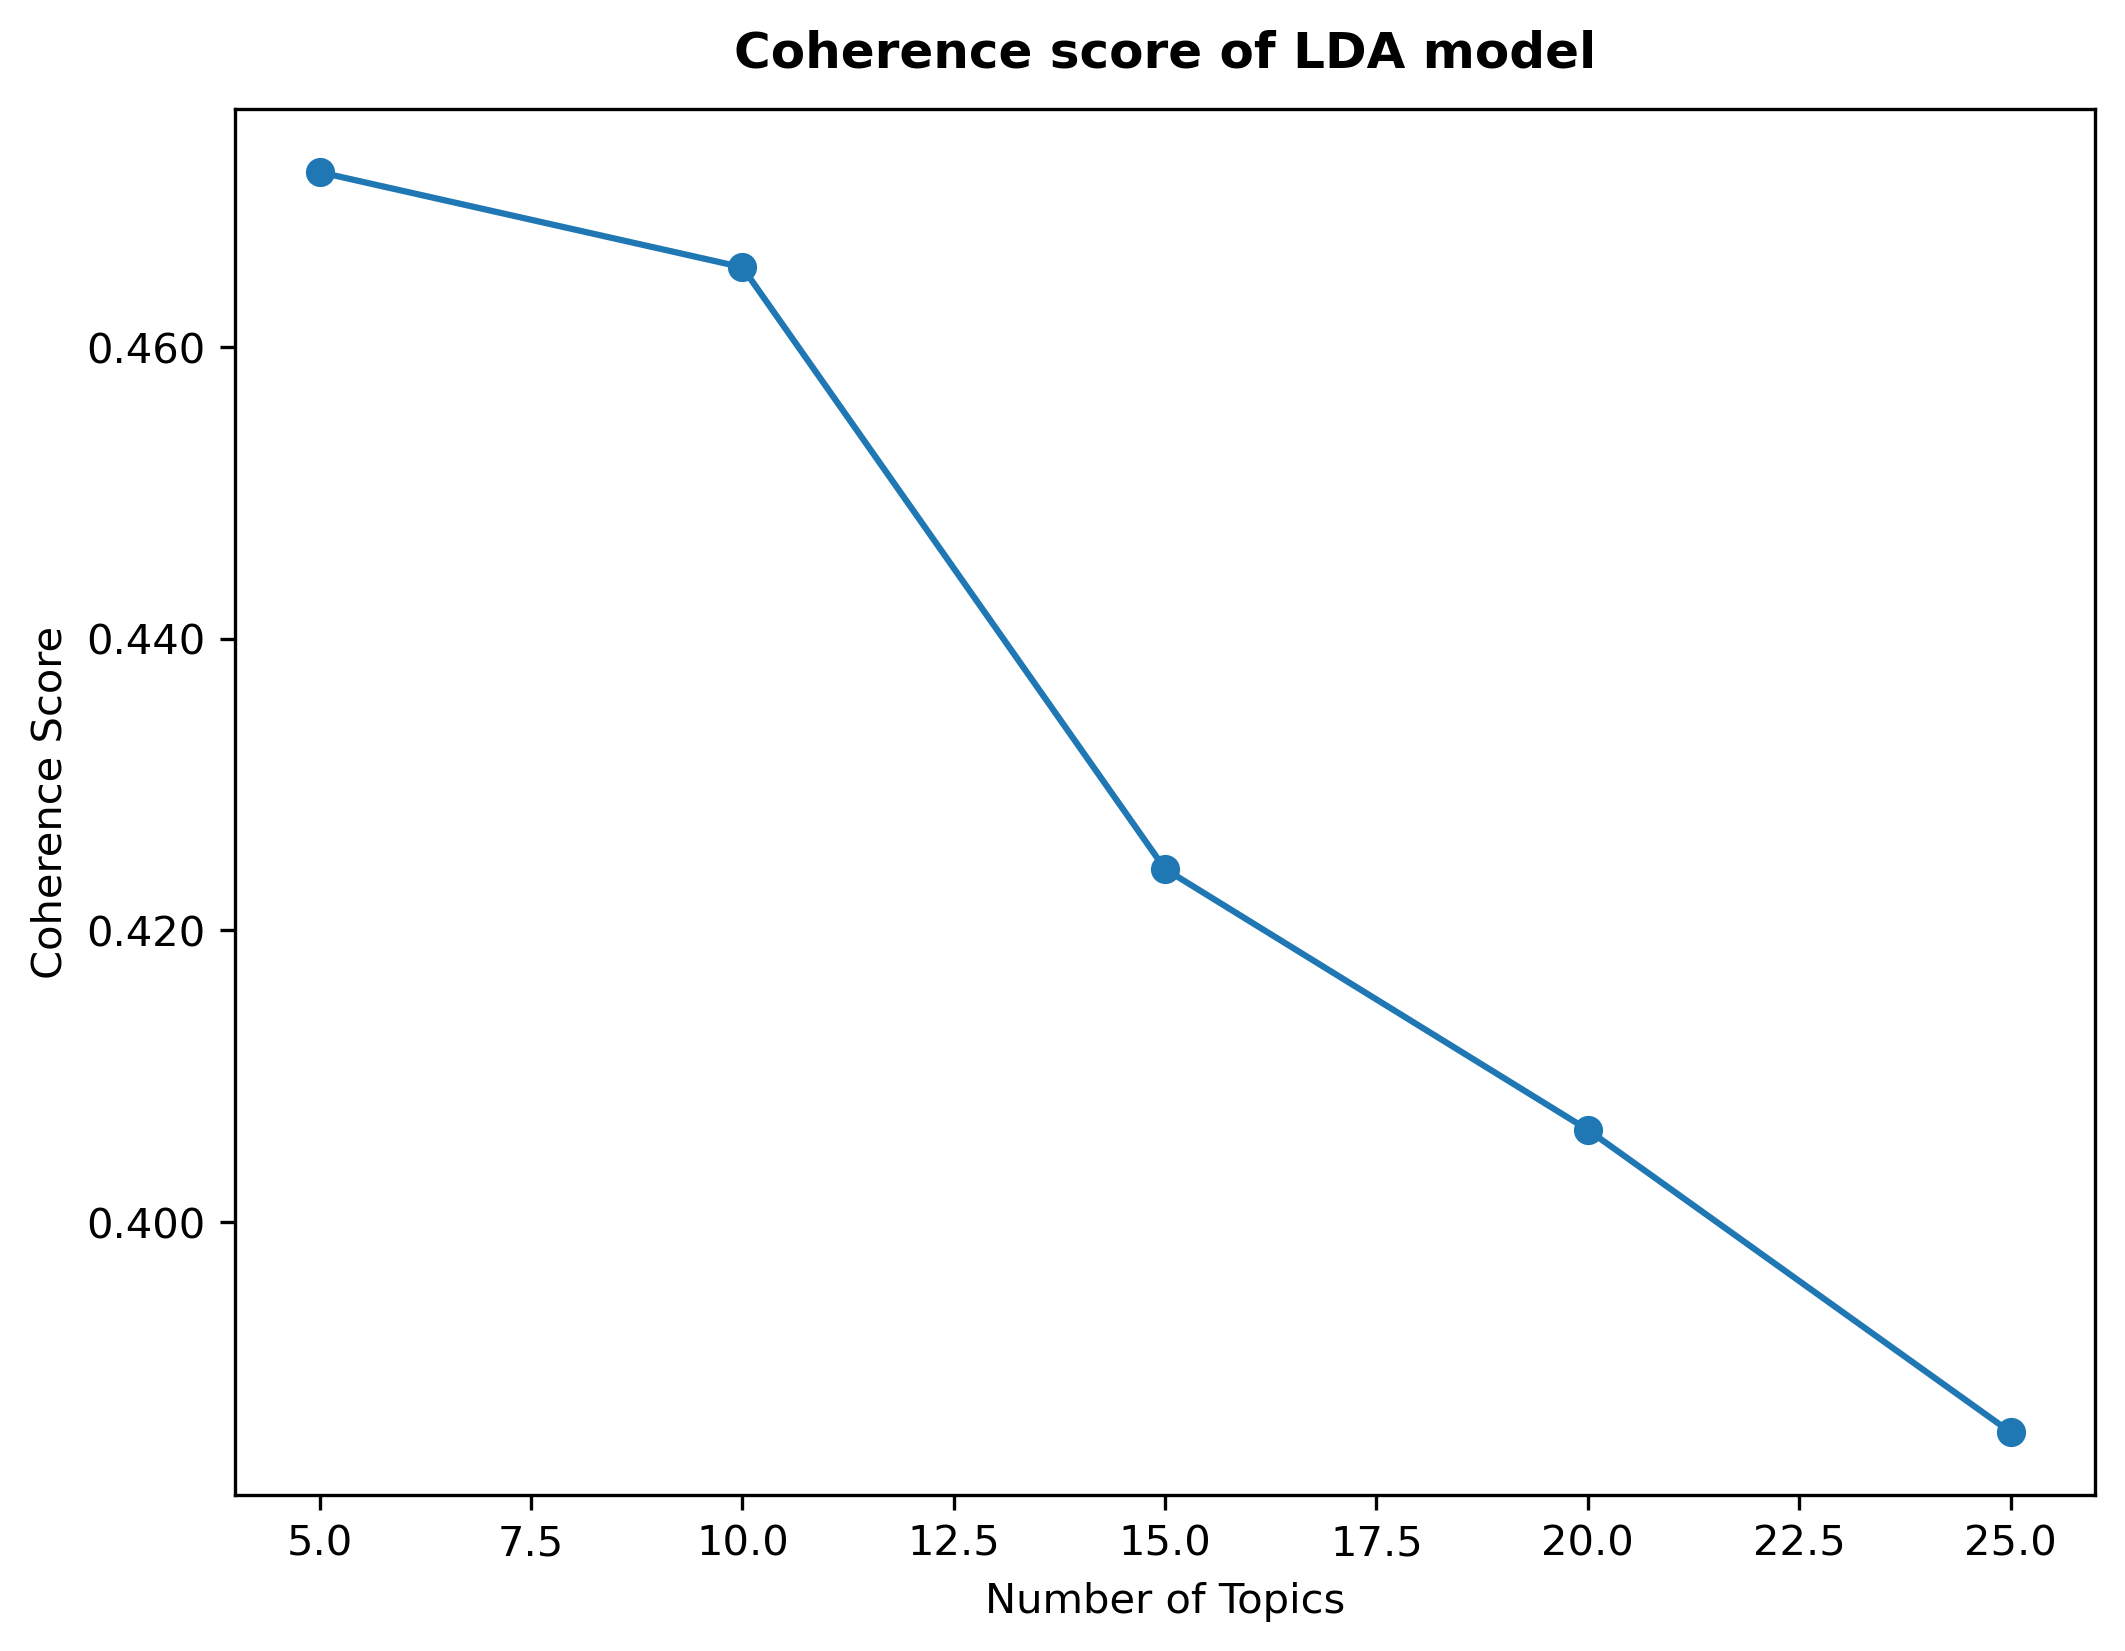

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=300) 
x = range(start, limit, step)
plt.plot(x, coherence_values, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))
plt.title('Coherence score of LDA model', fontsize=12, pad=10,fontweight='bold')
plt.savefig('coherence_score.png', bbox_inches='tight')
plt.show()

In [9]:
import numpy as np  # Import numpy
optimal_topic_num = x[np.argmax(coherence_values)]
print(f"Best number of topics: {optimal_topic_num}")

Best number of topics: 5


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import numpy as np
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [11]:
optimal_lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_topic_num, random_state=42)
topics = optimal_lda_model.show_topics(num_topics=-1, num_words=10)
for topic in topics:
    print(topic)

(0, '0.068*"app" + 0.057*"english" + 0.037*"language" + 0.025*"change" + 0.017*"chinese" + 0.017*"good" + 0.015*"cant" + 0.012*"use" + 0.012*"please" + 0.011*"translate"')
(1, '0.042*"english" + 0.019*"good" + 0.019*"language" + 0.014*"easy" + 0.012*"app" + 0.012*"option" + 0.011*"version" + 0.011*"use" + 0.008*"buy" + 0.008*"service"')
(2, '0.050*"cant" + 0.029*"app" + 0.018*"login" + 0.017*"english" + 0.015*"log" + 0.014*"even" + 0.013*"account" + 0.012*"chinese" + 0.010*"language" + 0.009*"dont"')
(3, '0.048*"english" + 0.042*"version" + 0.030*"app" + 0.015*"please" + 0.010*"cant" + 0.010*"need" + 0.008*"bad" + 0.008*"cannot" + 0.007*"taobao" + 0.007*"make"')
(4, '0.029*"app" + 0.027*"english" + 0.015*"please" + 0.011*"add" + 0.010*"language" + 0.010*"dont" + 0.009*"account" + 0.008*"order" + 0.007*"make" + 0.007*"chinese"')


In [12]:
topics_formatted = []
for topic_id in range(optimal_lda_model.num_topics):
    topic_terms = optimal_lda_model.get_topic_terms(topic_id, topn=10)
    topic_words = [dictionary[term_id] for term_id, _ in topic_terms]
    topics_formatted.append(topic_words)
for i, words in enumerate(topics_formatted):
    print(f"Topic #{i}: {', '.join(words)}")

Topic #0: app, english, language, change, chinese, good, cant, use, please, translate
Topic #1: english, good, language, easy, app, option, version, use, buy, service
Topic #2: cant, app, login, english, log, even, account, chinese, language, dont
Topic #3: english, version, app, please, cant, need, bad, cannot, taobao, make
Topic #4: app, english, please, add, language, dont, account, order, make, chinese


In [14]:
document_topics = optimal_lda_model.get_document_topics(corpus)
df1 = pd.DataFrame({
    'Document': df['cleaned_review'],
    'Topic': [sorted(topic_list, key=lambda x: x[1], reverse=True)[0][0] for topic_list in document_topics]
})
df1.to_csv('document_topics.csv', index=False)
print("The classification results of the document topics have been saved to the document_topics.csv file")

The classification results of the document topics have been saved to the document_topics.csv file


In [15]:
df1.head(5)

,Document,Topic
0,ive using app month options good however main ...,4
1,language barrier unfortunately language option...,0
2,keeps sign repeatedly claims security risks ac...,2
3,pretty satisfying cheap thing though ask sign ...,2
4,bought two hundred products since last year fr...,1


In [16]:
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(optimal_lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'lda_topics_visualization.html')
print("The HTML file has been generated and saved as 'lda_topics_visualization.html'")

The HTML file has been generated and saved as 'lda_topics_visualization.html'


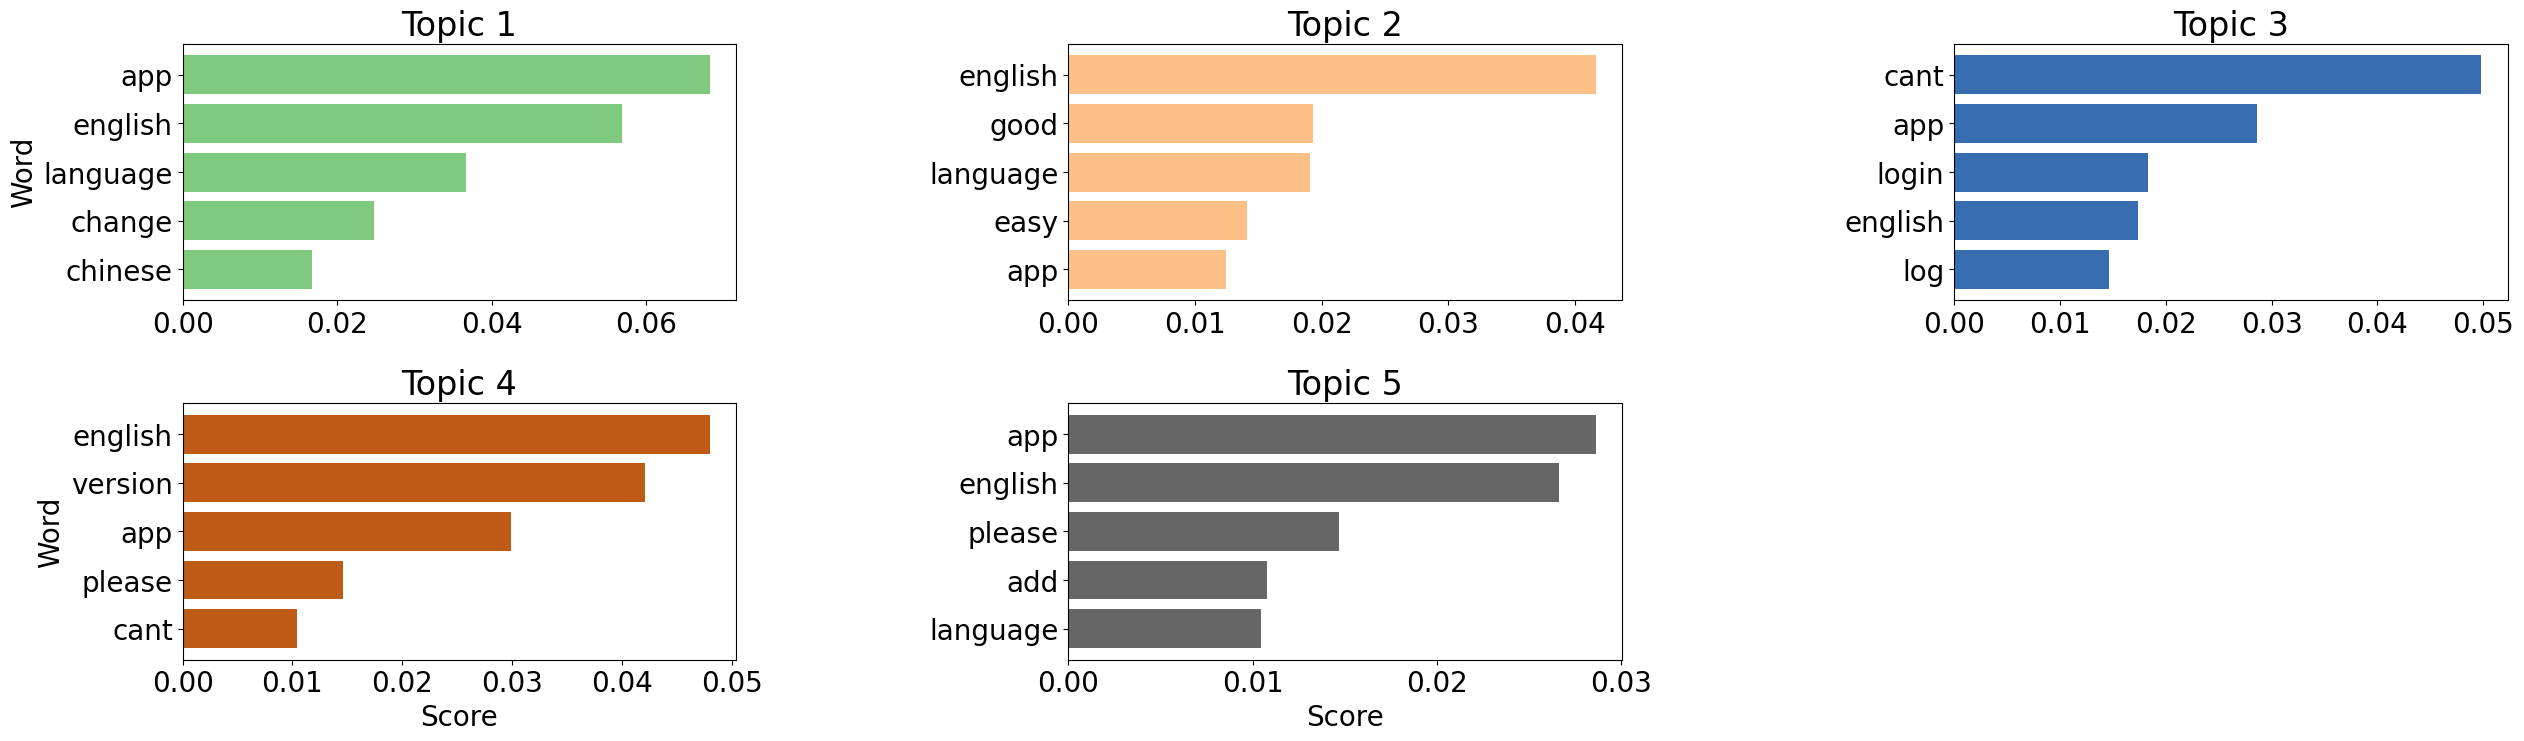

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np 

topic_words = optimal_lda_model.show_topics(num_topics=-1, num_words=5, formatted=False)
num_rows = (optimal_topic_num + 3) // 4
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 4 * num_rows))
fig.subplots_adjust(hspace=0.4, wspace=0.6)

colors = cm.Accent(np.linspace(0, 1, optimal_topic_num))

for i, topic in enumerate(topic_words):
    row = i // num_cols
    col = i % num_cols
    
    words, scores = zip(*topic[1])
    axs[row, col].barh(words, scores, color=colors[i])
    axs[row, col].invert_yaxis()  # Invert y-axis so that high scores are on top
    axs[row, col].set_title(f'Topic {i+1}', fontsize=24)  # Set subplot title font size
    axs[row, col].tick_params(axis='x', labelsize=20)  # Set x-axis tick label size
    axs[row, col].tick_params(axis='y', labelsize=20)  # Set y-axis tick label size

    if col == 0:
        axs[row, col].set_ylabel('Word', fontsize=20)
    if row == num_rows - 1:
        axs[row, col].set_xlabel('Score', fontsize=20)
        
for i in range(optimal_topic_num, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.savefig('topics_words.png', dpi=300)
plt.show()

### Topic naming and explanation

In [18]:
topics = {
0: {"keywords": ["snapchat", "app", "cant", "snap", "problem", "stories", "send", "dont"],
"name": "Functional Issues",
"description": "Send function, story function and common problems"},
1: {"keywords": ["app", "good", "camera", "ads", "videos", "pictures"],
"name": "Function Experience",
"description": "Camera, video, and ad experience feedback"},
2: {"keywords": ["friends", "people", "great", "good", "fun", "filters"],
"name": "Social Interaction",
"description": "Friends interaction and filter experience"},
3: {"keywords": ["friends", "ads", "notifications", "people", "get", "send"],
"name": "Notifications and Ads",
"description": "Notification interference and ad experience"},
4: {"keywords": ["account", "please", "im", "fix", "friends", "time"],
"name": "Account Issues",
"description": "Account management and repair request"}
}
topic_df = pd.DataFrame.from_dict(topics, orient='index')
print("Topic naming and description:")
print(topic_df[['name', 'description']])

Topic naming and description:
                    name                                        description
0      Functional Issues  Send function, story function and common problems
1    Function Experience          Camera, video, and ad experience feedback
2     Social Interaction          Friends interaction and filter experience
3  Notifications and Ads        Notification interference and ad experience
4         Account Issues              Account management and repair request


<details>
  <summary>主题命名与描述:</summary>
  <p>

- 0   功能问题  发送功能、故事功能和常见问题
- 1   功能体验    相机、视频和广告体验反馈
- 2   社交互动       朋友互动和滤镜体验
- 3  通知与广告       通知干扰和广告体验
- 4   账号问题       账号管理和修复请求
  </p>
</details>

### Topic sentiment analysis

In [38]:
!pip install textblob
!python -m textblob.download_corpora

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.9 MB/s eta 0:00:00
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
Finished.


[nltk_data] Downloading package brown to D:\Anaconda3\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to D:\Anaconda3\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to D:\Anaconda3\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     D:\Anaconda3\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to D:\Anaconda3\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     D:\Anaconda3\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [39]:
from textblob import TextBlob

# 对每一条 cleaned_review 计算情感得分
df['Sentiment_Score'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [40]:
print(df[['cleaned_review', 'Sentiment_Score']].head())

                                      cleaned_review  Sentiment_Score
0  ive using app month options good however main ...         0.244444
1  language barrier unfortunately language option...         0.303125
2  keeps sign repeatedly claims security risks ac...         0.083333
3  pretty satisfying cheap thing though ask sign ...         0.035714
4  bought two hundred products since last year fr...         0.179167


In [41]:
def assign_topic(text):
    for topic_id, topic_data in topics.items():
        if any(keyword in text for keyword in topic_data["keywords"]):
            return topic_id
    return None 

df['main_topic'] = df['cleaned_review'].apply(assign_topic)
topic_sentiments = []
for topic_id in topics.keys():
    topic_reviews = df[df['main_topic'] == topic_id]
    if not topic_reviews.empty:
        avg_sentiment = topic_reviews['Sentiment_Score'].mean()
        count = len(topic_reviews)
        topic_sentiments.append({
            'topic_id': topic_id,
            'topic_name': topics[topic_id]['name'],
            'avg_sentiment': avg_sentiment,
            'review_count': count,
            'percent': count / len(df) * 100
        })
sentiment_df = pd.DataFrame(topic_sentiments).sort_values('avg_sentiment', ascending=False)

In [42]:
sentiment_df.head(5)

,topic_id,topic_name,avg_sentiment,review_count,percent
1,1,Function Experience,0.338912,195,3.90
2,2,Social Interaction,0.151192,114,2.28
0,0,Functional Issues,0.013630,2721,54.42
4,4,Account Issues,-0.025852,409,8.18
3,3,Notifications and Ads,-0.052885,71,1.42


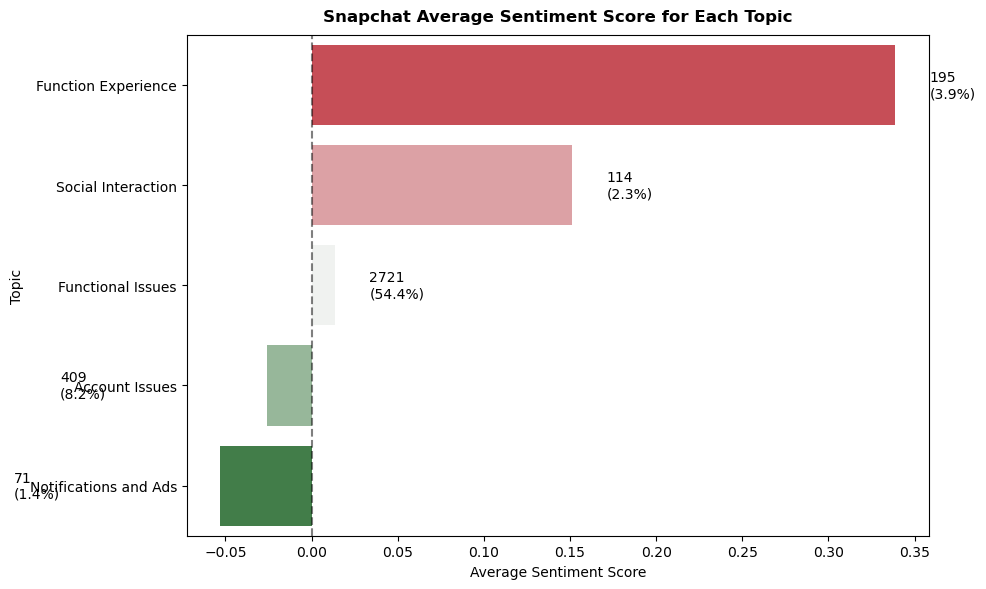

In [43]:
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.barplot(x='avg_sentiment',y='topic_name',hue='topic_name',data=sentiment_df,
                 palette=sns.diverging_palette(10, 130, n=len(sentiment_df)),legend=False )
plt.title('Snapchat Average Sentiment Score for Each Topic',fontsize=12, pad=10, fontweight='bold')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Topic')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)  # Neutral sentiment line
for i, row in enumerate(sentiment_df.itertuples()):
    label = f"{row.review_count}\n({row.percent:.1f}%)"
    ax.text(row.avg_sentiment + (0.02 if row.avg_sentiment > 0 else -0.12), 
            i, label, va='center', fontsize=10)
plt.tight_layout()
plt.savefig('topic_sentiment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

### Topic word cloud

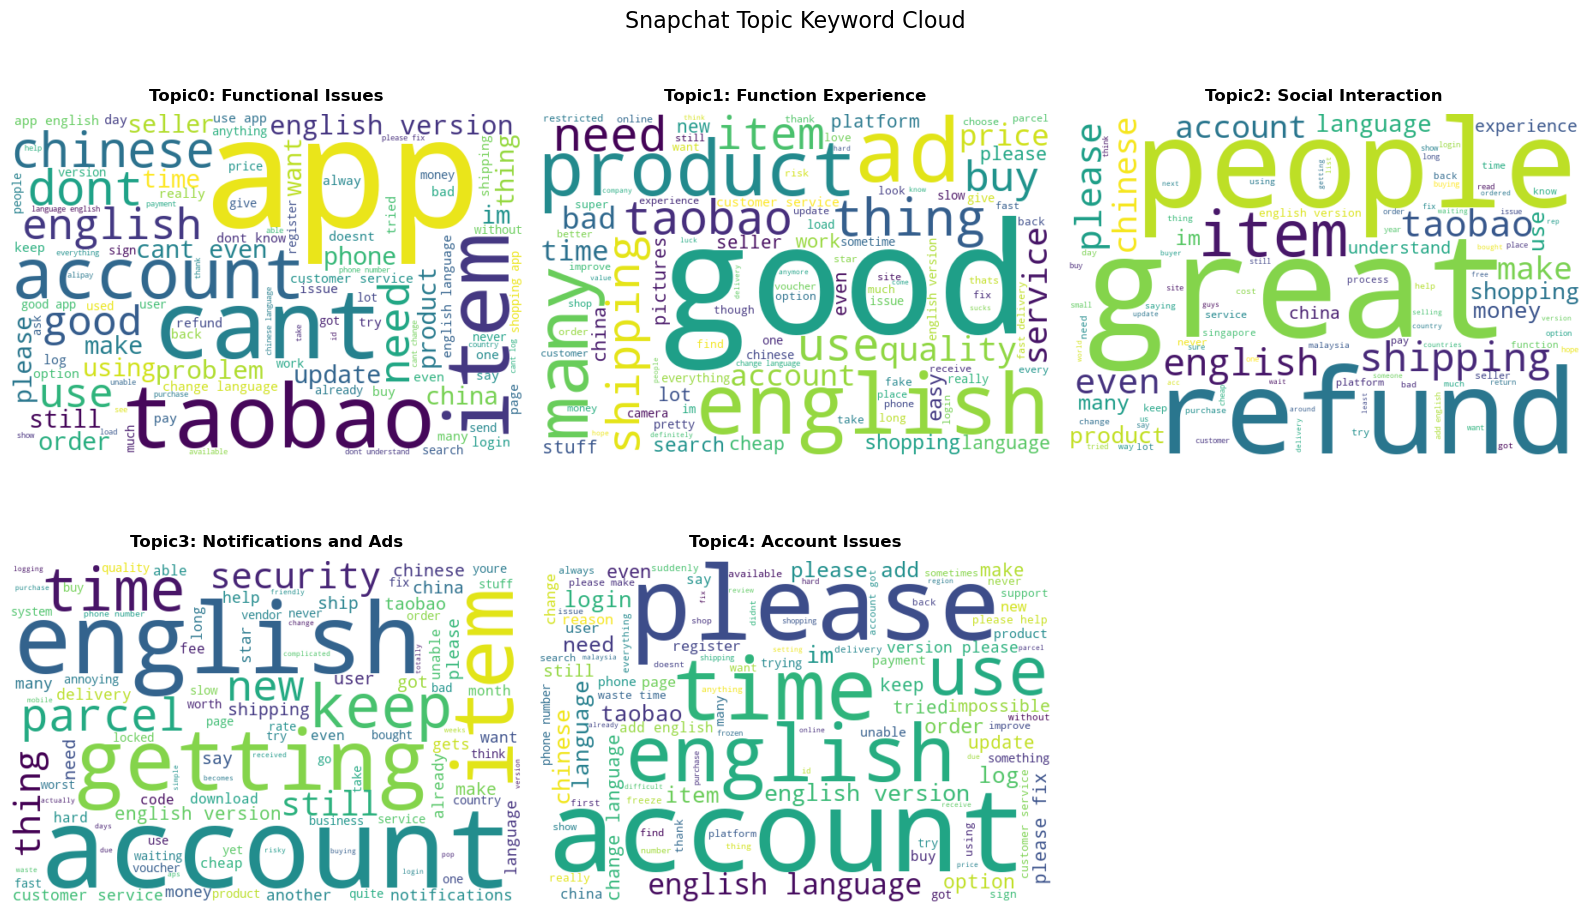

In [44]:
from wordcloud import WordCloud
plt.figure(figsize=(16, 10))
for i, (topic_id, topic_data) in enumerate(topics.items()):
    topic_reviews = df[df['main_topic'] == topic_id]
    if len(topic_reviews) > 0:
        text = " ".join(topic_reviews['cleaned_review'])
        
        wordcloud = WordCloud(width=600, height=400, 
                             background_color='white',
                             max_words=100).generate(text)
        
        plt.subplot(2, 3, i+1)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Topic{topic_id}: {topic_data['name']}", fontsize=12,pad=10,fontweight='bold')
        plt.axis('off')
plt.suptitle('Snapchat Topic Keyword Cloud', fontsize=16, y=0.98)
plt.tight_layout()
plt.savefig('topic_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

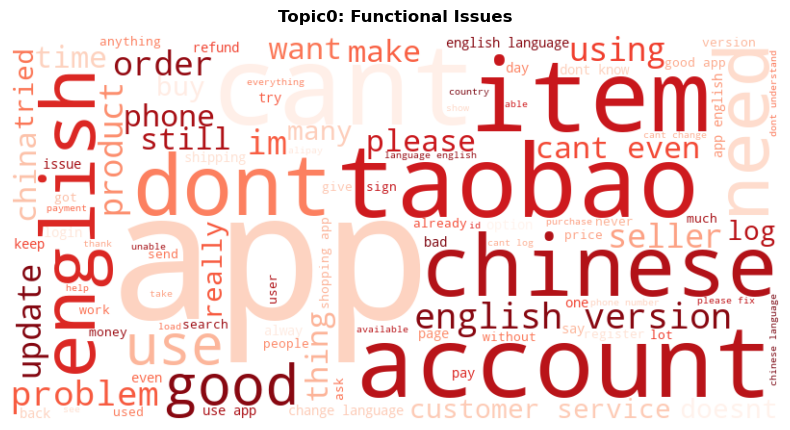

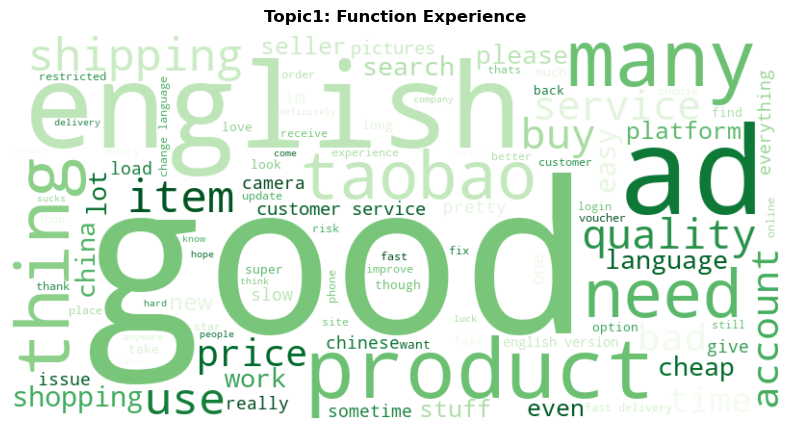

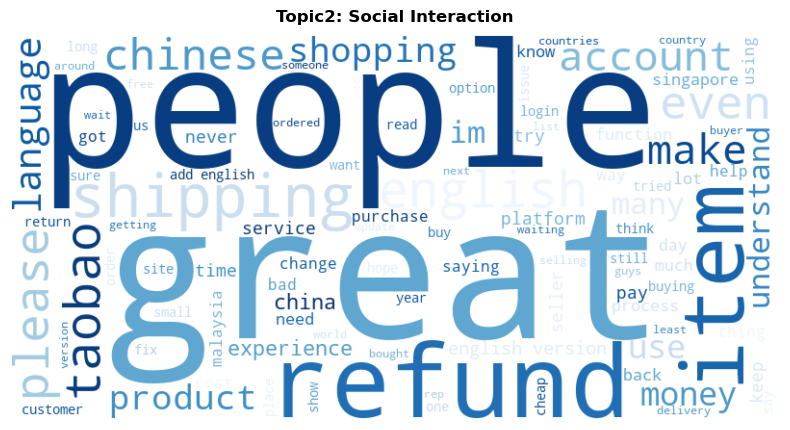

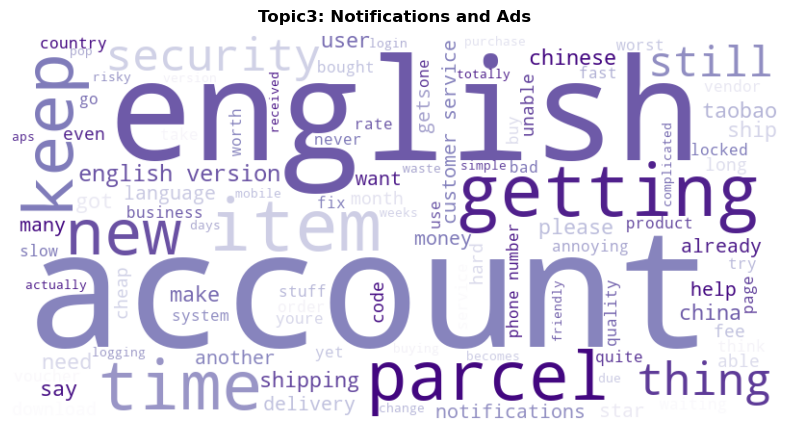

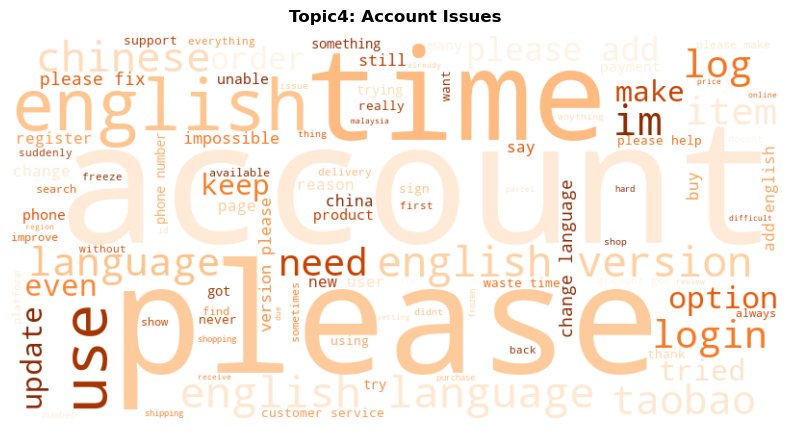

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
topic_colors = {0: 'Reds', 1: 'Greens', 2: 'Blues', 3: 'Purples', 4: 'Oranges'}

for topic_id, topic_data in topics.items():
    topic_reviews = df[df['main_topic'] == topic_id]
    
    if len(topic_reviews) > 0:
        text = []
        for review in topic_reviews['cleaned_review']:
            if isinstance(review, list):
                text.extend(review)
            else:
                text.extend(review.split())
        text = " ".join(text)
        wordcloud = WordCloud(width=800,height=400,background_color='white',max_words=100,
            colormap=topic_colors.get(topic_id, 'viridis')  # Use topic color or default
        ).generate(text)
        
        plt.figure(figsize=(8, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Topic{topic_id}: {topic_data['name']}", 
                  fontsize=12, pad=10, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(f'topic_{topic_id}_wordcloud.png', dpi=300, bbox_inches='tight')
        plt.show()

### 4. 主题时间趋势分析

In [46]:
# 将“评论时间”列转换为 datetime 格式（如果尚未转换）
df['评论时间'] = pd.to_datetime(df['评论时间'], errors='coerce')

# 提取年月，格式为 'YYYY-MM'，并存到新列 'month'
df['month'] = df['评论时间'].dt.to_period('M').astype(str)


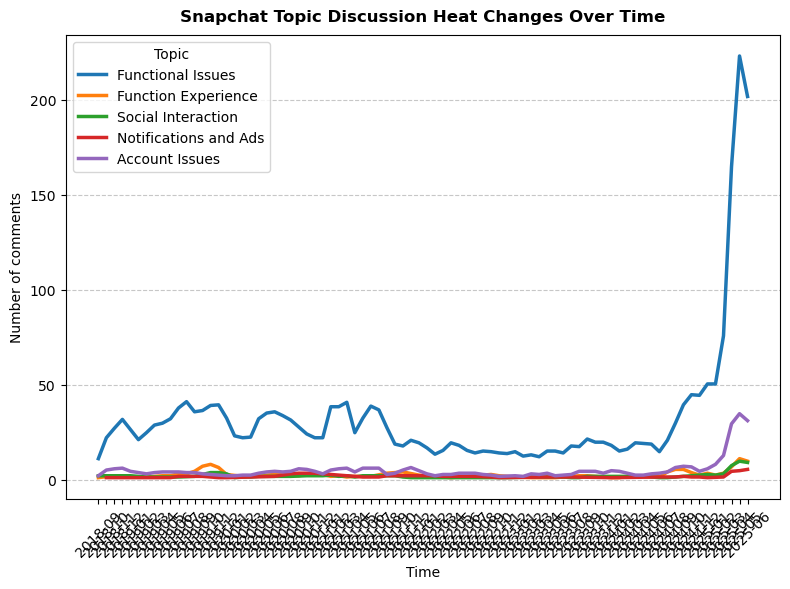

In [47]:
plt.figure(figsize=(8,6))
for topic_id, topic_data in topics.items():
    topic_reviews = df[df['main_topic'] == topic_id]
    if not topic_reviews.empty:
        monthly_trend = topic_reviews.groupby('month').size()
        smoothed = monthly_trend.rolling(window=3, min_periods=1).mean()
        plt.plot(smoothed.index.astype(str), smoothed.values, 
                 label=f"{topic_data['name']}", 
                 linewidth=2.5)

plt.title('Snapchat Topic Discussion Heat Changes Over Time', fontsize=12, pad=10,fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Number of comments')
plt.xticks(rotation=45)
plt.legend(title='Topic', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('topic_trends_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

### 6. 主题关键词情感分析

In [48]:
keyword_sentiments = []
for topic_id, topic_data in topics.items():
    for keyword in topic_data["keywords"]:
        keyword_reviews = df[df['cleaned_review'].str.contains(keyword, case=False)]
        if not keyword_reviews.empty:
            avg_sentiment = keyword_reviews['Sentiment_Score'].mean()
            count = len(keyword_reviews)
            keyword_sentiments.append({
                'topic_id': topic_id,
                'topic_name': topic_data['name'],
                'keyword': keyword,
                'avg_sentiment': avg_sentiment,
                'review_count': count
            })
keyword_df = pd.DataFrame(keyword_sentiments)

In [49]:
keyword_df.head(5)

,topic_id,topic_name,keyword,avg_sentiment,review_count
0,0,Functional Issues,app,0.015018,1945
1,0,Functional Issues,cant,-0.011000,804
2,0,Functional Issues,snap,0.410417,1
3,0,Functional Issues,problem,0.031410,182
4,0,Functional Issues,send,-0.057492,83


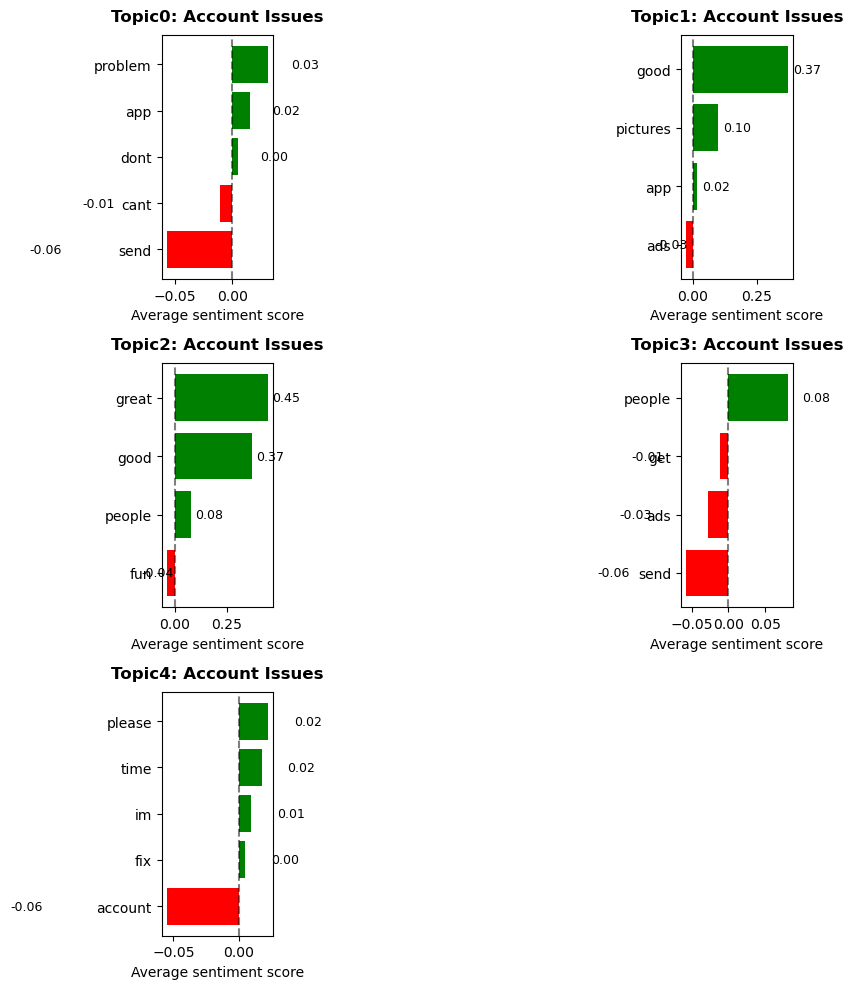

In [50]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='executing')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='ast')
plt.figure(figsize=(14, 10))
for i, topic_id in enumerate(topics.keys()):
    plt.subplot(3, 2, i+1)
    topic_keywords = keyword_df[keyword_df['topic_id'] == topic_id].sort_values('avg_sentiment')
    significant = topic_keywords[topic_keywords['review_count'] > 20]
    colors = np.where(significant['avg_sentiment'] > 0, 'green', 'red')
    plt.barh(significant['keyword'], significant['avg_sentiment'], color=colors)
    for j, row in enumerate(significant.itertuples()):
        plt.text(row.avg_sentiment + (0.02 if row.avg_sentiment > 0 else -0.12), 
                 j, f"{row.avg_sentiment:.2f}", va='center', fontsize=9)
    
    plt.title(f"Topic{topic_id}: {topic_data['name']}", fontsize=12,pad=10,fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.xlabel('Average sentiment score')
plt.tight_layout()
plt.savefig('topic_keyword_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()